# **Eficiencia energética**
En el presente trabajo se utilizó un conjunto de datos resultado de una simulación en Ecotec, el cual es un software de análisis de diseño sustentable y ofrece una amplia gama de simulaciones y análisis de funcionamiento energético que permite mejorar el rendimiento de los edificios existentes o nuevos. Así mismo, permite integrar los análisis de energía, agua y emisiones de carbono, con herramientas que permiten visualizar y simular el comportamiento del edificio en el contexto de su entorno. Este conjunto de datos se desarrolló como insumo para el articulo "*Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools*"[1], en el cual a partir de los datos obtenidos en simulación desarrollan varios modelos para estimar la eficiencia energetica utilizando herramientas de Machine Learning.

En este conjunto de datos se tomaron 768 muestras, de las cuales se utilizaron 12 formas de edificios variando los siguientes parametros: 



*   $ x_1$ = Capacidad relativa
*   $ x_2 $ = Área de la superficie
*   $ x_3 $ = Área de la pared
*   $ x_4 $ = Área del techo 
*   $ x_5 $ = Altura total
*   $ x_6 $ = Orientación
*   $ x_7 $ = Área de acristalamiento
*   $ x_8 $ = Distribución del área de acristalamiento

De los párametros anteriores corresponden a las salidas del conjunto de datos y como entradas, se tienen las siguientes:

*   $y_1$ = Carga de calefacción
*   $y_2$ = Carga de enfriamiento






## **Visualización y exploración de datos**

A continuación se cargan las librerias que se usaran: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


Se carga el conjunto de datos el cual está en formato .xlsx

In [ ]:

dataset = pandas.read_excel("/content/drive/MyDrive/Colab Notebooks/data_set.xlsx")
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


Se obtiene información de los valores del conjunto de datos.

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Se obtiene la información estadistica del conjunto de datos.

In [ ]:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### **Visualización conjunto de datos**

A partir de histogramas se visualiza la distribución de los datos para cada variable del conjunto de datos.


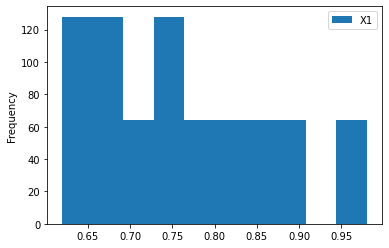

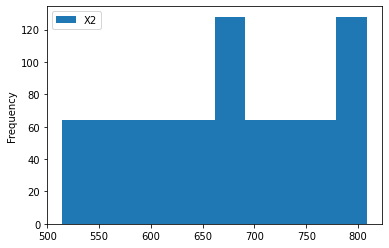

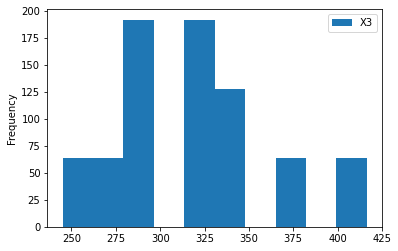

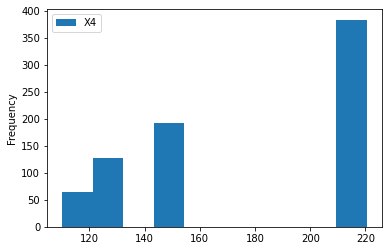

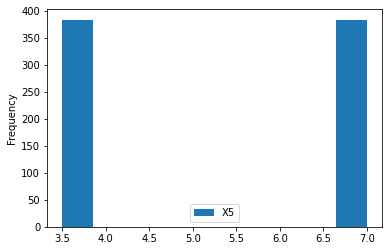

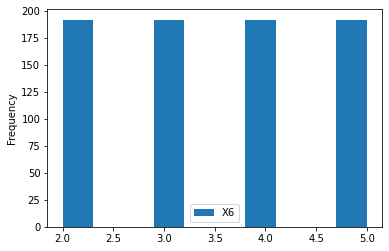

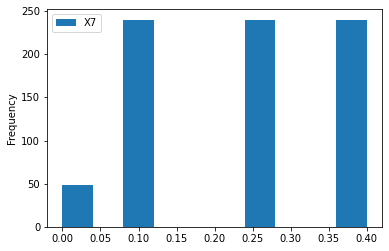

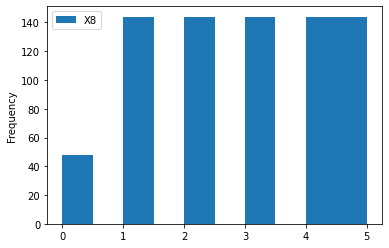

In [ ]:
x_1 = dataset[['X1']].plot(kind = 'hist') 
x_2 = dataset[['X2']].plot(kind = 'hist') 
x_3 = dataset[['X3']].plot(kind = 'hist') 
x_4 = dataset[['X4']].plot(kind = 'hist')
x_5 = dataset[['X5']].plot(kind = 'hist') 
x_6 = dataset[['X6']].plot(kind = 'hist') 
x_7 = dataset[['X7']].plot(kind = 'hist') 
x_8 = dataset[['X8']].plot(kind = 'hist')


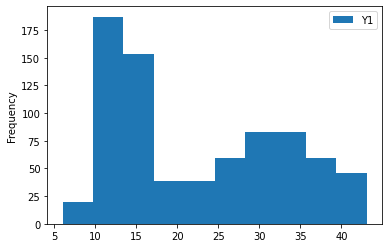

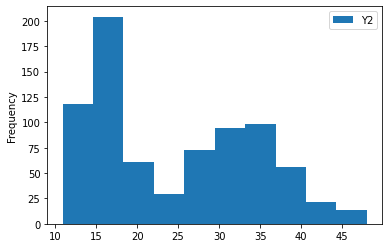

In [ ]:
y_1 = dataset[['Y1']].plot(kind = 'hist') 
y_2 = dataset[['Y2']].plot(kind = 'hist')

A partir de las gráficas obtenidas anteriormente, se puede estimar la densidad de probabilidad de los datos y en algunos casos estimar el número de posibles valores para cada variable. Así mismo, se puede observar que niguna de las variables corresponde a una distibución normal.

## **Separación de los datos de entrenamiento y prueba**

Para separar los datos de entrenamiento y prueba,primero separamos el conjunto de datos en tres: El conjunto $ X $ en donde estarán los datos únicamente las variables de entrada ( $X_i $ ) y los dos conjuntos corresponden para cada variable de salida ( $Y_1$ y $Y_2$).

In [ ]:
X=dataset.drop(['Y1','Y2'],axis=1)
y1=dataset['Y1']
y2=dataset['Y2']


Ahora con la libreria Sklearn separamos las variables que serán de entrenamiento y las de prueba para $ X $, $y1$ y $y2$. Se eligió el conjunto de prueba del 25% y el conjunto de entrenamiento del 75%.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.25)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.25)


In [ ]:
#from sklearn.preprocessing import StandardScaler
#escalar = StandardScaler()

#X_train = escalar.fit_transform(X_train)
#X_test = escalar.transform(X_test)

## **Regresión**

Se cargan los modelos a utilizar y métricas

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn import linear_model


from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

## **Predicciones para la carga de calefacción $y_1$**

### **Vecinos más cercanos**




Error cuadratico:
117.10498729984376
Puntaje:
-0.03879210889784801


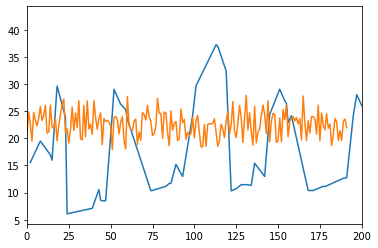

In [ ]:
KNN = KNeighborsRegressor(n_neighbors = 20)
KNN.fit(X_train, y1_train)      #Entreno el algoritmo
y1_KNN = KNN.predict(X_test)    #Hago la predicción

y1_testdat = pd.DataFrame(y1_test)
Y1_test= y1_testdat.sort_index()

plt.plot(Y1_test)
plt.plot(y1_KNN)

plt.xlim([0, 200])


error1KNN = mean_squared_error(Y1_test, y1_KNN) #Error cuadratico medio

score1KNN = r2_score(Y1_test, y1_KNN) #Puntaje, coeficiente de determinación




print('Error cuadratico:')
print(error1KNN)

print('Puntaje:')
print(score1KNN)

### **Regresión Lineal sin restricciones**

-0.011002554740502157
[ 2.68010796e+01  7.11339005e+12 -7.11339005e+12 -1.42267801e+13
  4.82597351e-01  1.22163057e-01  2.20087670e+00  1.53005123e-02]
-28.333116269867965


ValueError: ignored

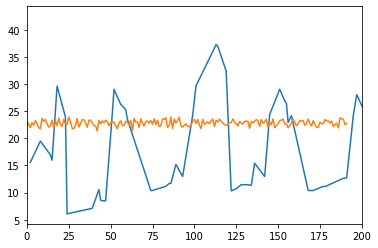

In [ ]:
reglineal = linear_model.LinearRegression()
reglineal.fit(X_train, y1_train)

rl_score = reglineal.score(X_train, y1_train)
rl_coef = reglineal.coef_
rl_int = reglineal.intercept_

y1_rl = reglineal.predict(X_test)

print(rl_score)
print(rl_coef)
print(rl_int)

plt.plot(Y1_test)
plt.plot(y1_rl)
plt.xlim([0, 200])



error1rl = mean_squared_error(Y1_test, y1_rl) #Error cuadratico medio
score1rl = r2_score(Y1_test, y1_rl) #Puntaje, coeficiente de determinación


print('Error cuadratico:')
print(error1rl)

print('Puntaje:')
print(score1rl)



## **Predicciones para la carga de enfriamiento $y_2$**

### **Vecinos más cercanos**

In [ ]:
KNN = KNeighborsRegressor(n_neighbors = 3)
KNN.fit(X_train, y2_train)      #Entreno el algoritmo
y2_KNN = KNN.predict(X_test)    #Hago la predicción

y2_testdat = pd.DataFrame(y2_test)
Y2_test= y2_testdat.sort_index()

plt.plot(Y2_test)
plt.plot(y2_KNN)

plt.xlim([0, 200])


error2KNN = mean_squared_error(Y2_test, y2_KNN) #Error cuadratico medio

score2KNN = r2_score(Y2_test, y2_KNN) #Puntaje, coeficiente de determinación




print('Error cuadratico:')
print(error2KNN)

print('Puntaje:')
print(score2KNN)

### **Regresión lineal sin restricciones**

In [ ]:
reglineal = linear_model.LinearRegression()
reglineal.fit(X_train, y2_train)

r2l_score = reglineal.score(X_train, y2_train)
r2l_coef = reglineal.coef_
r2l_int = reglineal.intercept_

y2_rl = reglineal.predict(X_test)

print(r2l_score)
print(r2l_coef)
print(r2l_int)

plt.plot(Y2_test)
plt.plot(y2_rl)
plt.xlim([0, 200])



error2rl = mean_squared_error(Y2_test, y2_rl) #Error cuadratico medio
score2rl = r2_score(Y2_test, y2_rl) #Puntaje, coeficiente de determinación

print('Error cuadratico:')
print(error2rl)

print('Puntaje:')
print(score2rl)

## **Clasificación**


Se ajusta el conjunto de datos para las variables $y_1$ y $y_2$, dado que se clasifican sus resultados de la siguiente manera:

**Carga de calefacción($y_1$)**

$[6-18]$ = 1 - Baja
\
$(18- 31]$ = 2 - Media
\
$(31-44]$ = 3 - Alta

**Carga de enfriamiento($y_2$)**

$[11-23]$ = 1 - Baja
\
$(23- 35]$ = 2 - Media
\
$(35-49]$ = 3 - Alta

In [ ]:
dataset1 = pandas.read_excel("/content/drive/MyDrive/Colab Notebooks/copia_data_set.xlsx")
dataset1

In [ ]:
yc_1 = dataset1[['Y1']].plot(kind = 'hist') 
yc_2 = dataset1[['Y2']].plot(kind = 'hist')

### **Separación de los datos de entreamiento y prueba**

In [ ]:
Xc=dataset1.drop(['Y1','Y2'],axis=1)
yc1=dataset1['Y1']
yc2=dataset1['Y2']

Xc_train, Xc_test, yc1_train, yc1_test = train_test_split(Xc, yc1, test_size=0.25)
Xc_train, Xc_test, yc2_train, yc2_test = train_test_split(Xc, yc2, test_size=0.25)


In [ ]:
from sklearn.linear_model import LogisticRegression #Regresión logistica
from sklearn.neighbors import KNeighborsClassifier #Vecinos más cercanos
from sklearn.naive_bayes import GaussianNB # Clasificador Bayesiano

from sklearn.metrics import confusion_matrix #Matriz de confusión
from sklearn.metrics import accuracy_score #Exactitud
from sklearn.metrics import mean_squared_error #Error cuadratico 


### **Regresión Logistica**

### **Predicciones para la carga de calefacción $y_1$**

In [ ]:
LogR = LogisticRegression(multi_class = 'multinomial')

LogR.fit(Xc_train, yc1_train)
yc1_LogR = LogR.predict(Xc_test)

yc1_LogR


matrizLR1 = confusion_matrix(yc1_test, yc1_LogR)

exactitudLR1 = accuracy_score(yc1_test, yc1_LogR)

errorLR1 = mean_squared_error(yc1_test, yc1_LogR)

print('Matriz de confusión:')
print(matrizLR1)

print('Exactitud del modelo:')
print(exactitudLR1)

print('Error del modelo:')
print(errorLR1)


### **Predicciones para la carga de Enfriamiento $y_2$**

In [ ]:
LogR = LogisticRegression(multi_class = 'multinomial')

LogR.fit(Xc_train, yc2_train)
yc2_LogR = LogR.predict(Xc_test)

yc2_LogR


matrizLogR2 = confusion_matrix(yc2_test, yc2_LogR)

exactitudLogR2 = accuracy_score(yc2_test, yc2_LogR)

errorLogR2 = mean_squared_error(yc2_test, yc2_LogR)

print('Matriz de confusión:')
print(matrizLogR2)

print('Exactitud del modelo:')
print(exactitudLogR2)

print('Error del modelo:')
print(errorLogR2)

### **Vecinos Cercanos**

### **Predicciones para la carga de calefacción $y_1$**

In [ ]:

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(Xc_train, yc1_train)
yc1_KNN = KNN.predict(Xc_test)


matrizKNN1 = confusion_matrix(yc1_test, yc1_KNN)

exactitudKNN1 = accuracy_score(yc1_test, yc1_KNN)

errorKNN1 = mean_squared_error(yc1_test, yc1_KNN)

print('Matriz de confusión:')
print(matrizKNN1)

print('Exactitud del modelo:')
print(exactitudKNN1)

print('Error cuadrático:')
print(errorKNN1)




### **Predicciones para la carga de enfriamiento $y_2$**

In [ ]:

KNN = KNeighborsClassifier(n_neighbors = 4)
KNN.fit(Xc_train, yc2_train)
yc2_KNN = KNN.predict(Xc_test)


matrizKNN2 = confusion_matrix(yc2_test, yc2_KNN)

exactitudKNN2 = accuracy_score(yc2_test, yc2_KNN)

errorKNN2 = mean_squared_error(yc2_test, yc2_KNN)

print('Matriz de confusión:')
print(matrizKNN2)

print('Exactitud del modelo:')
print(exactitudKNN2)

print('Error cuadrático:')
print(errorKNN2)

### **Clasificador Bayesiano**

### **Predicciones para la carga de calefacción $y_1$**

In [ ]:
bayes = GaussianNB()

bayes.fit(Xc_train, yc1_train)
yc1_bayes = bayes.predict(Xc_test)

yc1_bayes

matriz_bayes1 = confusion_matrix(yc1_test, yc1_bayes)


exactitud_bayes1 = accuracy_score(yc1_test, yc1_bayes)

error_bayes1 = mean_squared_error(yc1_test, yc1_bayes)

print('Matriz de confusión:')
print(matriz_bayes1)

print('Exactitud del modelo:')
print(exactitud_bayes1)

print('Error del modelo:')
print(error_bayes1)

### **Predicciones para la carga de enfriamiento $y_2$**

In [ ]:
bayes = GaussianNB()

bayes.fit(Xc_train, yc2_train)
yc2_bayes = bayes.predict(Xc_test)

yc2_bayes

matriz_bayes2 = confusion_matrix(yc2_test, yc2_bayes)


exactitud_bayes2 = accuracy_score(yc2_test, yc2_bayes)

error_bayes2 = mean_squared_error(yc2_test, yc2_bayes)

print('Matriz de confusión:')
print(matriz_bayes2)

print('Exactitud del modelo:')
print(exactitud_bayes2)

print('Error del modelo:')
print(error_bayes2)


La estimación cuantitativa del rendimiento energético en edifcios residenciales utilizando herramientas de aprendizaje automático  son una forma de alivianar la demanda cada vez mayor de suministros de energía adicional de tal manera que se diseñen edificios más eficiente energeticamenten con mejores propiedades para la conservaciñon de la energía. 

Es así que con la estimación de la carga de calefacción y de enfriamiento permite determinar las especificaciones del equipo de calefacción para mantener las condiciones óptimas del aire.